In [144]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
import math as m
from math import sqrt
from sympy import *
from IPython.display import display, Markdown, Math
import matplotlib.pyplot as plt
init_printing(use_latex='mathjax')

In [110]:
a, b, s, zeta, omega, r_1, s_0, s_1, a_0 = symbols('a b s zeta omega r_1 s_0 s_1 a_0')
A = (s*(s + a))
B = b
B_minus = b
G = B/A
A_m = s**2 + 2*zeta*omega*s + omega**2
B_m = omega**2
G_m = B_m/A_m
B_m_prime = B_m/B_minus
R_prime = s + r_1
S = s_0*s + s_1
A_0 = s + a_0
T_ = A_0*B_m_prime

# Plant Transfer Function

In [111]:
display(Math('A = '+latex(A)+';\\; \\; \\;'+'B = '+latex(B)))
display(Math('G = \\frac{B}{A} ='+latex(B)))
display(Math('B^- = '+latex(B_minus)+';\\; \\; \\;'+'B^+ = 1'+';\\; \\; \\;'+"B_{m}^{'} = "+latex(B_m_prime)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Closed Loop Model Transfer Function

In [112]:
display(Math("A_m = "+latex(A_m)+';\\; \\; \\;'+"B_m = "+latex(B_m)))
display(Math("G_m = \\frac{B_m}{A_m} ="+latex(G_m)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Observer Polynomial

In [113]:
display(Math('A_0 = '+latex(A_0)))

<IPython.core.display.Math object>

# Control Polynomials

In [114]:
display(Math("R = B^{+}R^{'} = R^{'} = "+latex(R_prime)))
display(Math('S = '+latex(S)))
display(Math('T = '+latex(T_)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Control Parameters

In [115]:
r_1_ = 2*zeta*omega + a_0 - a
s_0_ = (omega**2 + 2*zeta*omega*a_0 - a*r_1_)/b
s_0_ = simplify(expand(s_0_))
s_1_ = a_0*omega**2/b

display(Math('r_1 = '+latex(r_1_)))
display(Math('s_0 = '+latex(s_0_)))
display(Math('s_1 = '+latex(s_1_)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Control Polynomials in Terms of Estimated Parameters

In [116]:
R = R_prime.subs(r_1, r_1_)
S_ = s_0_*s + s_1_
T_ = A_0*B_m_prime

display(Math("R = B^{+}R^{'} = R^{'} = "+latex(R)))
display(Math('S = '+latex(S_)))
display(Math('T = '+latex(T_)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Bilinear Transformation of Filtered Input and Output Signals

In [117]:
H_f = 1/A_m
display(Math('H_f = '+latex(H_f)))

<IPython.core.display.Math object>

In [118]:
T, q = symbols('T q')

bilinear_T = (2/T)*((1 - q**(-1))/(1 + q**(-1)))
bilinear_T

  ⎛    1⎞
2⋅⎜1 - ─⎟
  ⎝    q⎠
─────────
  ⎛    1⎞
T⋅⎜1 + ─⎟
  ⎝    q⎠

## Bilinear Transformation of Output Signal

In [119]:
class numden_coeffs:
    def __init__(self, expr, order_num, order_denum, symb):
        self.num, self.denum = fraction(expr)
        self.symb = symb
        self.common_factor = None
        self.lst_denum_coeff = self.build_lst(self.denum, order_denum)
        self.lst_num_coeff = self.build_lst(self.num, order_num)
        display(Markdown(r"Numerator coefficients (beta)"), self.lst_num_coeff[::-1])
        display(Markdown(r"Denominator coefficients (alpha)"), self.lst_denum_coeff[::-1])
        
        
    def build_lst(self, poly, order):
        lst = [expand(poly).coeff(self.symb**i) for i in range((order), 0, -1)]
        lst.append(poly.subs(self.symb,0))
        if (self.common_factor == None):
            self.common_factor = lst[0]
            
        lst = [simplify(lst[i]/self.common_factor) for i in range(order + 1)]
        return lst
        

In [120]:
H_fy = s*H_f
H_fy = collect(simplify(expand(H_fy.subs(s,bilinear_T))), q)
display(Math('qH_fy(t) = '+latex(T_)))

<IPython.core.display.Math object>

In [121]:
obj_H_fy_coef = numden_coeffs(H_fy, 2, 2, q)

Numerator coefficients (beta)

⎡       -2⋅T                     2⋅T        ⎤
⎢───────────────────, 0, ───────────────────⎥
⎢ 2  2                    2  2              ⎥
⎣T ⋅ω  + 4⋅T⋅ω⋅ζ + 4     T ⋅ω  + 4⋅T⋅ω⋅ζ + 4⎦

Denominator coefficients (alpha)

⎡ 2  2                     ⎛ 2  2    ⎞      ⎤
⎢T ⋅ω  - 4⋅T⋅ω⋅ζ + 4     2⋅⎝T ⋅ω  - 4⎠      ⎥
⎢───────────────────, ───────────────────, 1⎥
⎢ 2  2                 2  2                 ⎥
⎣T ⋅ω  + 4⋅T⋅ω⋅ζ + 4  T ⋅ω  + 4⋅T⋅ω⋅ζ + 4   ⎦

### Difference Equation for $Y_1$ 

In [122]:
y1_k_1, y1_k_2, y_k_2, y_k = symbols('y_{1}(k-1) y_{1}(k-2) y(k-2) y(k)')

lst_alpha = obj_H_fy_coef.lst_denum_coeff
lst_beta = obj_H_fy_coef.lst_num_coeff

y1_k = -y1_k_1*lst_alpha[1] - y1_k_2*lst_alpha[2] + y_k_2*lst_beta[2] + y_k*lst_beta[0]
display(Math('y_{1}(kT) ='+latex(y1_k)))

<IPython.core.display.Math object>

## Bilinear Transformation of Input Signal

In [123]:
H_fu = H_f
H_fu = collect(simplify(expand(H_fu.subs(s,bilinear_T))), q)
display(Math('H_fu(t) ='+latex(H_fu)))

<IPython.core.display.Math object>

In [124]:
obj_H_fu_coef = numden_coeffs(H_fu, 2, 2, q)

Numerator coefficients (beta)

⎡          2                     2                   2        ⎤
⎢         T                   2⋅T                   T         ⎥
⎢───────────────────, ───────────────────, ───────────────────⎥
⎢ 2  2                 2  2                 2  2              ⎥
⎣T ⋅ω  + 4⋅T⋅ω⋅ζ + 4  T ⋅ω  + 4⋅T⋅ω⋅ζ + 4  T ⋅ω  + 4⋅T⋅ω⋅ζ + 4⎦

Denominator coefficients (alpha)

⎡ 2  2                     ⎛ 2  2    ⎞      ⎤
⎢T ⋅ω  - 4⋅T⋅ω⋅ζ + 4     2⋅⎝T ⋅ω  - 4⎠      ⎥
⎢───────────────────, ───────────────────, 1⎥
⎢ 2  2                 2  2                 ⎥
⎣T ⋅ω  + 4⋅T⋅ω⋅ζ + 4  T ⋅ω  + 4⋅T⋅ω⋅ζ + 4   ⎦

### Difference Equation for $u_0$

In [125]:
u0_k_1, u0_k_2, u_k, u_k_1, u_k_2 = symbols('u_{0}(k-1) u_{0}(k-2) u(k) u(k-1) u(k-2)')

lst_alpha = obj_H_fu_coef.lst_denum_coeff
lst_beta = obj_H_fu_coef.lst_num_coeff

u0_k = -u0_k_1*lst_alpha[1] - u0_k_2*lst_alpha[2] + u_k*lst_beta[0] + u_k_1*lst_beta[1] + u_k_2*lst_beta[2]
display(Math('u_{0}(kT) ='+latex(u0_k)))

<IPython.core.display.Math object>

# Bilinear Transformation of Control Polynomials

## Bilinear Transformation of $\frac{T}{R}$

In [126]:
T_R_prime = T_/R_prime
T_R_prime = T_R_prime.subs(omega, 1)
T_R_prime_bilinear_T = collect(simplify(expand(T_R_prime.subs(s, bilinear_T))), q)

display(Math('\\frac{T}{R} ='+latex(T_R_prime_bilinear_T)))

<IPython.core.display.Math object>

In [127]:
obj_T_R_prime_bilinear_T = numden_coeffs(T_R_prime_bilinear_T, 1, 1, q)

Numerator coefficients (beta)

⎡  T⋅a₀ - 2      T⋅a₀ + 2  ⎤
⎢────────────, ────────────⎥
⎣b⋅(T⋅r₁ + 2)  b⋅(T⋅r₁ + 2)⎦

Denominator coefficients (alpha)

⎡T⋅r₁ - 2   ⎤
⎢────────, 1⎥
⎣T⋅r₁ + 2   ⎦

## Bilinear Transformation of $\frac{S}{R}$

In [128]:
S_R_prime = S/R_prime
S_R_prime = collect(simplify(expand(S_R_prime.subs([(omega, 1), (zeta, 0.7), (a_0, 2)]))), s)

S_R_prime_bilinear_T = collect(simplify(expand(S_R_prime.subs(s, bilinear_T))), q)
display(Math('\\frac{S}{R} ='+latex(S_R_prime_bilinear_T)))

<IPython.core.display.Math object>

In [129]:
obj_S_R_prime_bilinear_T = numden_coeffs(S_R_prime_bilinear_T, 1, 1, q)

Numerator coefficients (beta)

⎡T⋅s₁ - 2⋅s₀  T⋅s₁ + 2⋅s₀⎤
⎢───────────, ───────────⎥
⎣  T⋅r₁ + 2     T⋅r₁ + 2 ⎦

Denominator coefficients (alpha)

⎡T⋅r₁ - 2   ⎤
⎢────────, 1⎥
⎣T⋅r₁ + 2   ⎦

## Control Equation $u(t) = \frac{T}{R}u_c - \frac{S}{R}y(t)$

In [130]:
u_k_1, u_c_k, u_c_k_1, y_k_1, y_k = symbols('u(k-1) u_{c}(k) u_{c}(k-1) y(k-1) y(k)')

lst_T_beta = obj_T_R_prime_bilinear_T.lst_num_coeff
lst_S_beta = obj_S_R_prime_bilinear_T.lst_num_coeff
lst_R_alpha = obj_S_R_prime_bilinear_T.lst_denum_coeff

u_bk = -u_k_1*lst_R_alpha[1] + u_c_k*lst_T_beta[0] + u_c_k_1*lst_T_beta[1] - y_k_1*lst_S_beta[1] - y_k*lst_S_beta[0]
display(Math('u(kT) ='+latex(u_bk)))

<IPython.core.display.Math object>

__Step 1:__ Substitue values for $a_0, T, \omega$ and $\zeta$ into all equations and turn all equations into python functions

__Step 2:__ derive $y_1(kT)$ and $u_0(kT)$ with equations derived above which depend on previous values of $y_1(kT)$ and $u_0(kT)$ and present and previous values of $y(kT)$ and $u(kT)$

__Step 3:__ Plug present values of $y_1(kT)$ and $u_0(kT)$ into $\phi = [y_1 \; u_0]^T$ and subsequently $\hat{\theta} = (\Phi^T\Phi)^{-1}\Phi^TY$

__Step 4:__ Use RLS to find $\hat{a}$ and $\hat{b}$

__Step 5:__ Find control params $r_1$, $s_0$ and $s_1$ with $\hat{a}$ and $\hat{b}$

__Step 6:__ Plug $r_1$, $s_0$ and $s_1$ values into control law equation $u(kT)$ in above cell

In [131]:
a_0_val = 2
omega_val = 1
zeta_val = 0.7
T_val = 0.05

lst_denum_coeff_H_fy = [obj_H_fy_coef.lst_denum_coeff[i].subs([(T, T_val), (zeta, zeta_val), (omega, omega_val)]) for i in range(3)]
lst_num_coeff_H_fy = [obj_H_fy_coef.lst_num_coeff[i].subs([(T, T_val), (zeta, zeta_val), (omega, omega_val)]) for i in range(3)]

lst_denum_coeff_H_fu = [obj_H_fu_coef.lst_denum_coeff[i].subs([(T, T_val), (zeta, zeta_val), (omega, omega_val)]) for i in range(3)]
lst_num_coeff_H_fu  = [obj_H_fu_coef.lst_num_coeff[i].subs([(T, T_val), (zeta, zeta_val), (omega, omega_val)]) for i in range(3)]

In [132]:
lst_denum_coeff_T_R = [obj_T_R_prime_bilinear_T.lst_denum_coeff[i].subs([(r_1, r_1_),
                                                                         (s_0, s_0_),
                                                                         (s_1, s_1_),
                                                                         (zeta, zeta_val),
                                                                         (omega, omega_val),
                                                                         (T, T_val),
                                                                         (a_0, a_0_val)])
                       for i in range(2)]

lst_num_coeff_T_R = [obj_T_R_prime_bilinear_T.lst_num_coeff[i].subs([(r_1, r_1_),
                                                                     (s_0, s_0_),
                                                                     (s_1, s_1_),
                                                                     (zeta, zeta_val),
                                                                     (omega, omega_val),
                                                                     (T, T_val),
                                                                     (a_0, a_0_val)])
                       for i in range(2)]



display(Math('\\alpha\\frac{T}{R} = \\alpha\\frac{S}{R} ='+latex(lst_denum_coeff_T_R[::-1])))
display(Math('\\beta\\frac{T}{R} ='+latex(lst_num_coeff_T_R[::-1])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [133]:
lst_num_coeff_S_R = [simplify(obj_S_R_prime_bilinear_T.lst_num_coeff[i].subs([(r_1, r_1_),
                                                                              (s_0, s_0_),
                                                                              (s_1, s_1_),
                                                                              (zeta, zeta_val),
                                                                              (omega, omega_val),
                                                                              (T, T_val),
                                                                              (a_0, a_0_val)]))
                       for i in range(2)]
display(Math('\\beta\\frac{S}{R} ='+latex(lst_num_coeff_S_R)))

<IPython.core.display.Math object>

# Plant Control Input $u(kT)$

Which is the result of the control equation $u(t) = \frac{T}{R}u_c - \frac{S}{R}y(t)$

Variables are $u_{k1} = u(k-1), \; u_{ck} = u_c(k), \; u_{ck1} = u_c(k-1), \; y_{k} = y(k) \; y_{k1} = y(k-1)$

In [134]:
r_1_ = r_1_.subs([(zeta, zeta_val),(omega, omega_val)])
s_0_ = s_0_.subs([(zeta, zeta_val),(omega, omega_val)])
s_1_ = s_0_.subs([(zeta, zeta_val),(omega, omega_val)])

u_k_eq = u_bk.subs([(r_1, r_1_),(s_0, s_0_),(s_1, s_1_),(T, T_val),(a_0, a_0_val)])
display(Math('u(kT) ='+latex(u_k_eq)))

<IPython.core.display.Math object>

# Plant Output Equation $y(kT)$

Found with $G(s)$ Post bilinear transformation

In [135]:
theta_0 = np.array([1, 1])

G_bil = collect(simplify(expand(G.subs(s, bilinear_T))), q)
display(Math('G_{bilinear} ='+latex(G_bil)))

G_bil = collect(simplify(expand(expand(G_bil).subs([(T, T_val), (a,theta_0[0]), (b,theta_0[1])]))), q)
obj_G_bil= numden_coeffs(G_bil, 2, 2, q)

<IPython.core.display.Math object>

Numerator coefficients (beta)

[0.000609756097560976, 0.00121951219512195, 0.000609756097560976]

Denominator coefficients (alpha)

[0.951219512195122, -1.95121951219512, 1.0]

In [136]:
y_k1, y_k2, u_k, u_k1, u_k2 = symbols('y(k-1) y(k-2) u(k) u(k-1) u(k-2)') 

lst_G_beta = obj_G_bil.lst_num_coeff
lst_G_alpha = obj_G_bil.lst_denum_coeff

y_k_eq = -y_k1*lst_G_alpha[1] - y_k2*lst_G_alpha[2] + u_k*lst_G_beta[0] + u_k1*lst_G_beta[1] + u_k2*lst_G_beta[2]
display(Math('y(kT) ='+latex(y_k_eq)))

<IPython.core.display.Math object>

 # Equation for Finding $\phi = [-y_1 \; u_0]$

## Equation for  $y_{1}(𝑘𝑇)$

Variables are $y_{1k1} = y_1(k-1), \; y_{1k2} = y_1(k-2), \; y_{k} = y(k), \; y_{k2} = y(k - 2)$

In [137]:
y1_k_eq = y1_k.subs([(zeta, zeta_val),(omega, omega_val), (T, T_val)])
display(Math('y_{1}(kT) ='+latex(y1_k_eq)))

<IPython.core.display.Math object>

## Equation for  $u_{0}(𝑘𝑇)$ 

Variables are $u_{0k1} = u_0(k-1), \; u_{0k2} = u_0(k-2), \; u_{k} = u(k), \; u_{k1} = u(k - 1) \; u_{k2} = u(k - 2)$

In [138]:
u0_k_eq = u0_k.subs([(zeta, zeta_val),(omega, omega_val), (T, T_val)])
display(Math('u_{0}(kT) ='+latex(u0_k_eq)))

<IPython.core.display.Math object>

# Equation Summary

In [139]:
display(Math('u(kT) ='+latex(u_k_eq)))
display(Math('y(kT) ='+latex(y_k_eq)))
display(Math('y_{1}(kT) ='+latex(y1_k_eq)))
display(Math('u_{0}(kT) ='+latex(u0_k_eq)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Implementation

## Turning Above Equations into Functions

In [147]:
yk_func = lambdify([y_k1, y_k2, u_k, u_k1, u_k2], y_k_eq)
uk_func = lambdify([u_k_1, u_c_k, u_c_k_1,y_k, y_k_1, a, b], u_k_eq)
y1_k_func = lambdify([y1_k_1, y1_k_2, y_k, y_k_2], y1_k_eq)
u0_k_func = lambdify([u0_k_1, u0_k_2, u_k, u_k_1, u_k_2], u0_k_eq)

SyntaxError: invalid syntax (<lambdifygenerated-24>, line 1)

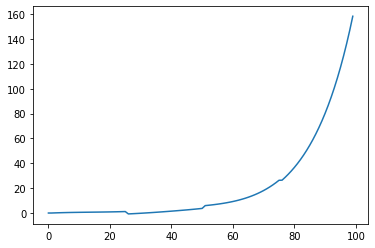

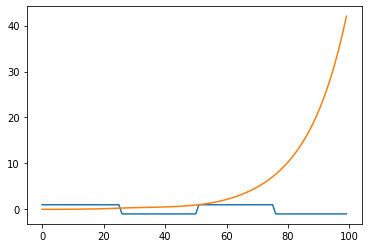

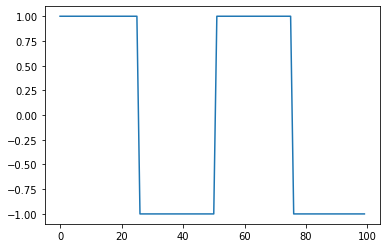

In [145]:
sample_depth = 100
sample_range = range(sample_depth)
starting_samples = 2

t = [i for i in sample_range]
u_c = np.ones(sample_depth)*-1
u_c[np.where([m.sin(t[i]*m.pi/25)>=0 for i in sample_range])] = 1

a = 1
b = 1

theta0 = np.array([a, b]).reshape(-1,1)
theta_hat = [np.array([1]*starting_samples).reshape(-1,1) for _ in range(starting_samples)]

y = [0]*starting_samples
u = [0]*starting_samples

y1 = [0]*starting_samples
u0 = [0]*starting_samples

lamb = 0
I = np.identity(2)
p = 100*I 

for k in range(2,sample_depth):
    phi = np.array([-y1[-1], u0[-1]]).reshape(-1,1)
    
    p = inv(inv(p) + phi@phi.T)
    K = p@phi
    theta_hat.append(theta_hat[-1] + K*(np.reshape(phi.T@theta0, ()) - phi.T@theta_hat[-1]))
    
    
    u.append(np.reshape(uk_func(u[k-1], u_c[k], u_c[k-1], phi.T@theta0, y[k-1], theta_hat[-1][0], theta_hat[-1][1]), ()))
    y.append(np.reshape(yk_func(y[k-1], y[k-2], u[k], u[k-1], u[k-2]), ()))
    
    y1.append(np.reshape(y1_k_func(y1[k-1], y1[k-2], y[k], y[k-2]), ()))
    u0.append(np.reshape(u0_k_func(u0[k-1], u0[k-2], u[k], u[k-1], u[k-2]), ()))
    

# pd.DataFrame(np.asarray(theta_hat).reshape(-1,4,), 
#                    columns=['a1', 'a2', 'b0', 'b1'])
plt.plot(t,u)
plt.show()

plt.plot(t,u_c)
plt.plot(t,y)
plt.show()

plt.plot(t,u_c)

In [142]:
for i in range(1, sample_depth):
    try:
        y[i] = y_k_func(y[i-1], y[i-2], u[i], )

SyntaxError: unexpected EOF while parsing (3375533771.py, line 3)